# Reward System & Q-learning

# Qustions:
**Q1:Explain what the number of states depends on. Can the number of states be reduced?**
**Solution:** The number of states in the context of Q-learning for the Pacman game depends on how the states are defined in the problem. In this implementation, each cell in the Pacman game grid is considered a state(with its actions). The number of states is equal to the number of cells in the grid. If the grid size is N x M, then the number of states is N * M. The number of states can potentially be reduced by removing unnecessarily cells like walls or ghosts. We can ignore wall cells, including the wrapper walls and also inside walls.

**Q2: Define Action, State, Rewards, and Goal State for the problem and provide your explanation.**
**Solution:** Action, State, Rewards, and Goal State are as follows:

1. **Action:**
   - An action represents a move that the Pacman agent can take in the game environment.
   - In this implementation, there are four possible actions:
     - `0`: Move Up
     - `1`: Move Right
     - `2`: Move Down
     - `3`: Move Left
   - The agent selects an action at each step based on its current state to navigate through the game grid.

2. **State:**
   - A state represents the current configuration or position of the Pacman agent in the game environment.
   - In this implementation, each cell in the game grid is considered a state.
   - The state is often denoted as a tuple `[row, column]` representing the current location of the Pacman agent in the grid.

3. **Rewards:**
   - Rewards are numerical values associated with different events or outcomes in the game environment.
   - The rewards dictionary specifies the rewards for different characters in the game for example:
     - `'W'`: Wall - A large negative reward (`-1000` in this example).
     - `'D'`: Dot - A positive reward (`1` in this example).
     - `'E'`: Empty - A small negative reward (`-0.1` in this example).
     - `'A'`: Agent - The current position of the Pacman agent (no explicit reward specified).
   - The rewards influence the Q-learning algorithm's learning process by guiding the agent to take actions that lead to higher cumulative rewards.

4. **Goal State:**
   - The goal state represents the condition that the agent aims to achieve in the game.
   - In the Pacman game, a potential goal state could be reaching a specific location where the agent collects all the dots. But since the agent don't have to be a specific location, we don't have the goal state explicitly. However, whenever the agent collects all dots, we reach the goal. In other words the goal of the Q-learning agent is implicitly defined by the rewards associated with different states. The agent learns to maximize its cumulative rewards, and reaching a state with a high reward (e.g., collecting all dots) is a form of achieving the goal.

**Q3:First, consider the environment as shown above. Analyze the effect of γ for at least 3 gamma values equal to 0.25, 0.5, and 1. Also, for at least 3 α values, analyze the results and determine the impact of α.**

**solution:** The answer of this question is provided in the below of this notebook.

**Q4:Display the environment as a weighted graph. The vertices of different modes and their weights are the amount of Reward after applying the corresponding Action. You can mention the corresponding Action as a Label on each edge.**
**solution** The corresponded graph image is provided in the below of this notebook. To display the environment as a weighted graph, we can represent each cell in the Pacman game grid as a vertex, and the possible actions as weighted edges connecting the vertices. The weights on the edges will correspond to the rewards associated with taking the corresponding actions. Here's a simplified representation:
```
Graph:

(Wall) ----(-1000000)----> (Wall)
  |                         |
(-1000000)               (-1000000)
  |                         |
(Pacman Start) --(-0.1)---> (Empty)
  |                         |
(Empty) ----(1)----> (Dot)
  |                         |
(Dot) ----(-0.1)----> (Empty)
  |                         |
(Empty) ----(-0.1)----> (Empty)

```
And if we want to represent Q-Table as a weighted graph, we can consider each states as vertices and their Q-Value as their weight. Also each vertices, have edge to the states that can reach them by an action. This representation is in the below of this notebook.

**Q5:Draw the Q-Table for this problem.**
**Solution:** I draw the q-table at the end of the code. The correspond function for this task is print_qtable.

**Q6:Test your code on another arbitrary environment and report the result.**
**Solution:** This task is completed in the code of below this notebook.

## Import libraries
Let's first import our libraries. I use 3 libraries: 1)"copy" for deepcopy of a matrix. 2)numpy for work faster with arrays. 3)matplotlib for display plot.


In [3]:
import copy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## Main Class: QLearningAgent
Now I define our main class for solving pacman. Let's have an explanation of this class.
#### Parameters:
- pacman_game: 2D NumPy array representing the Pacman game environment.
- initial_state: Initial state of the Pacman agent in the form [row, column].
- rewards: Dictionary specifying the rewards for different game characters ('W': Wall_penalty, 'D': Dot_reward, 'E': Empty_reward, 'A': Agent_reward).
- gamma: Discount factor for future rewards.
- learning_rate: The learning rate for updating the Q-values.
- exploration_rate: Initial exploration rate for epsilon-greedy action selection.
- exploration_decay: Rate at which the exploration rate decays over time.
#### Methods
**initialize(self)** -> None
- Initialize the Q-learning agent by counting the number of dots and setting the initial state based on the provided game environment.

**count_dots(self)** -> int
- Count and return the number of dots in the Pacman game.

**choose_action(self, state: list)** -> int
- Choose an action for the given state using epsilon-greedy strategy.

**state_to_coords(self, state: int)** -> tuple
- Convert a state index to coordinates (row, column).

**coords_to_state(self, i: int, j: int)** -> int
- Convert coordinates (row, column) to a state index.

**step(self, current_state: list, action: int)** -> tuple
- Take a step in the environment based on the current state and chosen action, and return the reward, new state, and the character at the new state. Also update the board based on the action. if next place of the agent is a Wall, the agent won't update its place but return reward(Penalty here).

**q_function(self, print_path: bool = False)** -> int
- Run the Q-learning algorithm to update Q-values and return the number of steps taken until all dots will be eaten.

**learn(self, num_episode: int)** -> tuple
- Train the agent over a specified number of episodes and return lists of episode numbers and the corresponding number of steps.

**display_board(self, board: np.ndarray)** -> None
- Display the Pacman game board using emoji symbols.

**print_path(self)** -> None
- Print the path taken by the Pacman agent during the Q-learning process.

**print_qtable(self)** -> None
- Print the Q-table representing Q-values for each state-action pair.

**show_plot(self, x: list, y: list)** -> None
- Display a plot of episode numbers versus the number of steps taken during the learning process.



In [4]:
class QLearningAgent:
    def __init__(self, pacman_game: np.ndarray,
                 initial_state: list,
                 rewards: dict,
                 gamma: float = 0.25,
                 learning_rate: float = 0.2,
                 exploration_rate: float = 0.9,
                 exploration_decay: float = 0.995):
        """
        Initializes the Q-learning agent with the specified parameters.

        Parameters:
        - pacman_game: 2D NumPy array representing the Pacman game environment.
        - initial_state: Initial state of the Pacman agent in the form [row, column].
        - rewards: Dictionary specifying the rewards for different game characters.
        - gamma: Discount factor for future rewards.
        - learning_rate: The learning rate for updating the Q-values.
        - exploration_rate: Initial exploration rate for epsilon-greedy action selection.
        - exploration_decay: Rate at which the exploration rate decays over time.
        """
        self.pacman_game = pacman_game
        self.current_board = copy.deepcopy(pacman_game)
        self.rewards = rewards  # {'W': -1000000, 'D': 1, 'E': -0.1}
        self.actions = {0: 'up', 1: 'right', 2: 'down', 3: 'left'}
        self.num_dots = 0
        self.initial_state = initial_state
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        # self.q_table = np.zeros((pacman_game.shape[0] * pacman_game.shape[1],4))
        self.q_table = [[0, 0, 0, 0] for i in range(pacman_game.shape[0] * pacman_game.shape[1])]

    def initialize(self):
        """
        Initializes the Q-learning agent by counting the number of dots
        and setting the initial state based on the provided game environment.
        """
        for i in range(self.pacman_game.shape[0]):
            for j in range(self.pacman_game.shape[1]):
                if self.pacman_game[i][j] == 'D':
                    self.num_dots += 1
                elif self.pacman_game[i][j] == 'A':
                    self.initial_state = [i, j]

        # self.initial_step()

    def count_dots(self):
        """
        Counts and returns the number of dots in the Pacman game.
        """
        num_dots = 0
        for i in range(self.pacman_game.shape[0]):
            for j in range(self.pacman_game.shape[1]):
                if self.pacman_game[i][j] == 'D':
                    num_dots += 1
        return num_dots

    def choose_action(self, state):
        """
        Chooses an action for the given state using epsilon-greedy strategy.

        Parameters:
        - state: Current state of the agent in the form [row, column].

        Returns:
        - Chosen action index (0: up, 1: right, 2: down, 3: left).
        """
        if np.random.rand() < self.exploration_rate:
            self.exploration_rate *= self.exploration_decay
            return np.random.choice((0, 1, 2, 3))
        else:
            self.exploration_rate *= self.exploration_decay
            choices = [[state[0] - 1, state[1]],
                       [state[0], state[1] + 1],
                       [state[0] + 1, state[1]],
                       [state[0], state[1] - 1]]
            # In the line below, I add the amount of the possible action rewards, to their q-value, then return the action that has maximum reward-QValue
            choices = [self.q_table[self.coords_to_state(*state)][i] + self.rewards[
                self.current_board[next_state[0]][next_state[1]]]
                       for i, next_state in enumerate(choices)]
            return max((0, 1, 2, 3), key=choices.__getitem__)

    def state_to_coords(self, state: int):
        """
        Converts a state index to coordinates (row, column).

        Parameters:
        - state: State index.

        Returns:
        - Tuple representing coordinates (row, column).
        """
        i = state // self.pacman_game.shape[1]
        j = state % self.pacman_game.shape[1]
        return i, j

    def coords_to_state(self, i: int, j: int):
        """
        Converts coordinates (row, column) to a state index.

        Parameters:
        - i: Row index.
        - j: Column index.

        Returns:
        - State index.
        """
        return i * self.pacman_game.shape[1] + j

    def step(self, current_state, action) -> tuple:
        """
        Takes a step in the environment based on the current state and chosen action,
        and returns the reward, new state, and the character at the new state.

        Parameters:
        - current_state: Current state of the agent in the form [row, column].
        - action: Chosen action index (0: up, 1: right, 2: down, 3: left).

        Returns:
        - Tuple (reward, new_state, new_state_char).
        """
        reward = 0
        new_state = current_state.copy()
        if action == 0:  # UP
            new_state[0] -= 1
        elif action == 1:  # RIGHT
            new_state[1] += 1
        elif action == 2:  # DOWN
            new_state[0] += 1
        elif action == 3:  # LEFT
            new_state[1] -= 1
            # reward = self.q_table[new_state][action]
        char = self.current_board[new_state[0]][new_state[1]]
        reward = self.rewards[char]
        if char == 'W':  # If the next state is the wall, then don't move the agent and just return its reward with current state
            new_state = current_state
        else:  # If the next state of the agent is not wall, then move the agent.
            self.current_board[current_state[0]][current_state[1]] = 'E'
            self.current_board[new_state[0]][new_state[1]] = 'A'
        return reward, new_state, char

    def q_function(self, print_path=False):
        """
        Runs the Q-learning algorithm to update Q-values and returns the number of steps taken until all dots will be eaten.

        Parameters:
        - print_path: If True, prints the path taken by the agent during the Q-learning process.

        Returns:
        - Number of steps taken during the Q-learning process.
        """
        self.current_board = copy.deepcopy(self.pacman_game)
        num_dots = self.num_dots
        num_step = 0
        current_state = self.initial_state.copy()
        while num_dots:
            action = self.choose_action(current_state)
            reward, new_state, new_state_char = self.step(current_state, action)
            if new_state_char == 'D':
                num_dots -= 1
            # Update q(s,a): Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            self.q_table[self.coords_to_state(*current_state)][action] += self.learning_rate * (
                    reward + self.gamma * max(self.q_table[self.coords_to_state(*new_state)]) -
                    self.q_table[self.coords_to_state(*current_state)][action])
            if current_state != new_state:
                num_step += 1
            current_state = new_state
            if print_path:
                print(f'***********{num_step}\n')
                self.display_board(self.current_board)
        return num_step

    def learn(self, num_episode, exploration_rate=None):
        """
        Trains the agent over a specified number of episodes and returns
        lists of episode numbers and the corresponding number of steps.

        Parameters:
        - num_episode: Number of episodes for training.

        Returns:
        - Tuple (x, y) where x is the list of episode numbers and y is the list of steps taken.
        """
        x = []
        y = []
        for i in range(num_episode):
            if not exploration_rate:
                self.exploration_rate = (num_episode - i) / (2 * num_episode)
            else:
                self.exploration_rate = exploration_rate
            num_step = self.q_function()
            print(f"episode {i} ended with {num_step} steps")
            x.append(i)
            y.append(num_step)
        return x, y

    def display_board(self, board):
        """
        Displays the Pacman game board using emoji symbols.

        Parameters:
        - board: 2D NumPy array representing the Pacman game board.
        """
        emoji_map = {
            'W': '🟫',
            'A': '🟡',
            'D': '🔸',
            'E': '⬛️'
        }
        for row in board:
            for char in row:
                print(emoji_map[char], end='')
            print()

    def print_path(self):
        """
        Prints the path taken by the Pacman agent during the Q-learning process.
        """
        self.current_board = copy.deepcopy(self.pacman_game)
        self.exploration_rate = 0.2
        print(self.current_board)
        self.q_function(print_path=True)

    def print_qtable(self):
        """
        Prints the Q-table representing Q-values for each state-action pair.
        """
        for i in range(self.pacman_game.shape[0] * self.pacman_game.shape[1]):
            print(self.q_table[i])

    def print_graph(self):
        q_table = copy.deepcopy(self.q_table)
        m, n = self.pacman_game.shape
        graph_matrix = [[0] * (m * n)
                        for _ in range(m * n)]
        for i in range(1, self.pacman_game.shape[0] - 1):
            for j in range(1, self.pacman_game.shape[1] - 1):
                currentState = [i, j]
                graph_matrix[i * m + j][(i + 1) * m + j] = q_table[i * m + j][0]
                graph_matrix[i * m + j][i * m + j + 1] = q_table[i * m + j][1]
                graph_matrix[i * m + j][(i - 1) * m + j] = q_table[i * m + j][2]
                graph_matrix[i * m + j][i * m + j - 1] = q_table[i * m + j][3]
        matrix = np.array(graph_matrix)

        G = nx.from_numpy_array(matrix)

        pos = nx.spring_layout(G)

        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
        labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()

    def show_plot(self, x, y):
        """
        Displays a plot of episode numbers versus the number of steps taken during the learning process.

        Parameters:
        - x: List of episode numbers.
        - y: List of steps taken.
        """
        plt.plot(x, y)
        plt.show()


# TestCases:
Now we test the model. first, let's define the assignment's test:

In [10]:
pacman_table = [
    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
    ['W', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'D', 'W', 'W', 'W', 'D', 'W', 'W', 'W', 'D', 'W'],
    ['W', 'D', 'W', 'D', 'D', 'D', 'D', 'D', 'W', 'D', 'W'],
    ['W', 'D', 'D', 'D', 'W', 'D', 'W', 'D', 'D', 'D', 'W'],
    ['W', 'D', 'W', 'D', 'W', 'E', 'W', 'D', 'W', 'D', 'W'],
    ['W', 'D', 'W', 'D', 'D', 'W', 'D', 'D', 'W', 'D', 'W'],
    ['W', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
]


#### Build our model
Now let's build our model with some parameters.

In [48]:
simulation = QLearningAgent(np.array(pacman_table),
                            initial_state=[1, 1],
                            learning_rate=0.1,
                            gamma=0.9,
                            exploration_rate=0.1,
                            exploration_decay=0.995,
                            rewards={'W': -1000,
                                     'D': 1,
                                     'E': -0.1})
simulation.initialize()
simulation.q_function()
x, y = simulation.learn(num_episode=250)
simulation.print_path()


episode 0 ended with 204 steps
episode 1 ended with 82 steps
episode 2 ended with 192 steps
episode 3 ended with 149 steps
episode 4 ended with 119 steps
episode 5 ended with 188 steps
episode 6 ended with 83 steps
episode 7 ended with 151 steps
episode 8 ended with 1581 steps
episode 9 ended with 311 steps
episode 10 ended with 304 steps
episode 11 ended with 138 steps
episode 12 ended with 386 steps
episode 13 ended with 112 steps
episode 14 ended with 196 steps
episode 15 ended with 112 steps
episode 16 ended with 92 steps
episode 17 ended with 103 steps
episode 18 ended with 164 steps
episode 19 ended with 100 steps
episode 20 ended with 106 steps
episode 21 ended with 136 steps
episode 22 ended with 137 steps
episode 23 ended with 115 steps
episode 24 ended with 157 steps
episode 25 ended with 92 steps
episode 26 ended with 217 steps
episode 27 ended with 88 steps
episode 28 ended with 189 steps
episode 29 ended with 100 steps
episode 30 ended with 88 steps
episode 31 ended with 2

#### Ploting the results

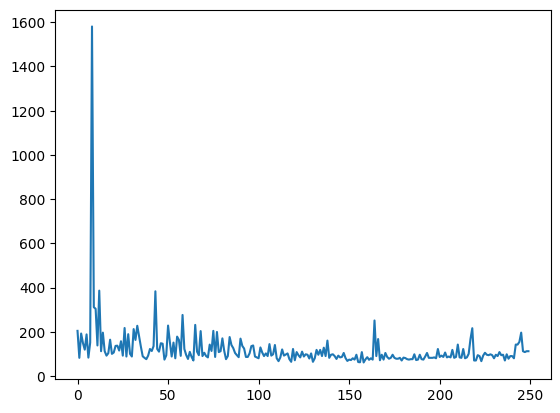

In [49]:
simulation.show_plot(x, y)

### Q3:First, consider the environment as shown above. Analyze the effect of γ for at least 3 gamma values equal to 0.25, 0.5, and 1. Also, for at least 3 α values, analyze the results and determine the impact of α.
**Solution:**

- **Gamma (γ) = 0.25:**
 As we can see, a low gamma value implies that the agent heavily discounts future rewards. The agent is more focused on immediate rewards, potentially leading to myopic behavior. So it causes faster learning, more emphasis on short-term rewards, But less consideration for long-term consequences, potential for suboptimal policies.
- **Gamma (γ) = 0.5:**
 A moderate gamma value balances the consideration of immediate and future rewards. The agent considers both short-term and long-term consequences in its decision-making. So it causes balanced consideration of short-term and long-term rewards. But Moderate learning speed.

- **Gamma (γ) = 1:**
 A gamma value of 1 means the agent considers all future rewards equally, without discounting. The agent is more focused on maximizing cumulative rewards over the long term.So it causes consideration of both short-term and long-term rewards equally ,But slower learning, potential for delayed convergence.

In [33]:
simulation = QLearningAgent(np.array(pacman_table),
                            initial_state=[1, 1],
                            learning_rate=0.1,
                            gamma=0.25,
                            exploration_rate=0.1,
                            exploration_decay=0.995,
                            rewards={'W': -1000,
                                     'D': 1,
                                     'E': -0.1})
simulation.initialize()
simulation.q_function()
x, y = simulation.learn(num_episode=250)
simulation.print_path()

episode 0 ended with 168 steps
episode 1 ended with 182 steps
episode 2 ended with 150 steps
episode 3 ended with 141 steps
episode 4 ended with 140 steps
episode 5 ended with 221 steps
episode 6 ended with 144 steps
episode 7 ended with 267 steps
episode 8 ended with 134 steps
episode 9 ended with 159 steps
episode 10 ended with 245 steps
episode 11 ended with 142 steps
episode 12 ended with 132 steps
episode 13 ended with 173 steps
episode 14 ended with 320 steps
episode 15 ended with 145 steps
episode 16 ended with 135 steps
episode 17 ended with 82 steps
episode 18 ended with 253 steps
episode 19 ended with 126 steps
episode 20 ended with 134 steps
episode 21 ended with 711 steps
episode 22 ended with 96 steps
episode 23 ended with 193 steps
episode 24 ended with 225 steps
episode 25 ended with 111 steps
episode 26 ended with 175 steps
episode 27 ended with 172 steps
episode 28 ended with 148 steps
episode 29 ended with 107 steps
episode 30 ended with 200 steps
episode 31 ended wit

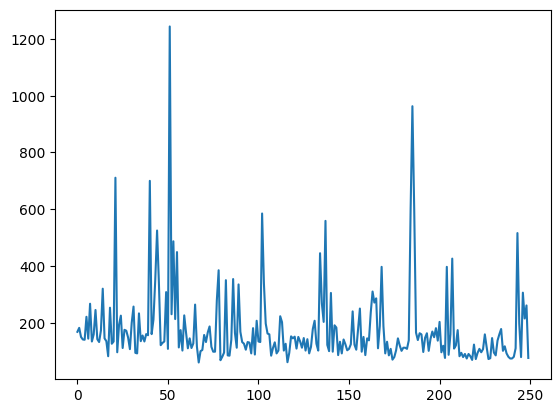

In [34]:
simulation.show_plot(x, y)

In [31]:
simulation = QLearningAgent(np.array(pacman_table),
                            initial_state=[1, 1],
                            learning_rate=0.1,
                            gamma=0.5,
                            exploration_rate=0.1,
                            exploration_decay=0.995,
                            rewards={'W': -1000,
                                     'D': 1,
                                     'E': -0.1})
simulation.initialize()
simulation.q_function()
x, y = simulation.learn(num_episode=250)
simulation.print_path()

episode 0 ended with 96 steps
episode 1 ended with 132 steps
episode 2 ended with 92 steps
episode 3 ended with 124 steps
episode 4 ended with 146 steps
episode 5 ended with 200 steps
episode 6 ended with 94 steps
episode 7 ended with 123 steps
episode 8 ended with 94 steps
episode 9 ended with 143 steps
episode 10 ended with 100 steps
episode 11 ended with 135 steps
episode 12 ended with 84 steps
episode 13 ended with 98 steps
episode 14 ended with 272 steps
episode 15 ended with 308 steps
episode 16 ended with 201 steps
episode 17 ended with 196 steps
episode 18 ended with 110 steps
episode 19 ended with 129 steps
episode 20 ended with 146 steps
episode 21 ended with 88 steps
episode 22 ended with 132 steps
episode 23 ended with 104 steps
episode 24 ended with 175 steps
episode 25 ended with 253 steps
episode 26 ended with 154 steps
episode 27 ended with 173 steps
episode 28 ended with 130 steps
episode 29 ended with 106 steps
episode 30 ended with 96 steps
episode 31 ended with 116 

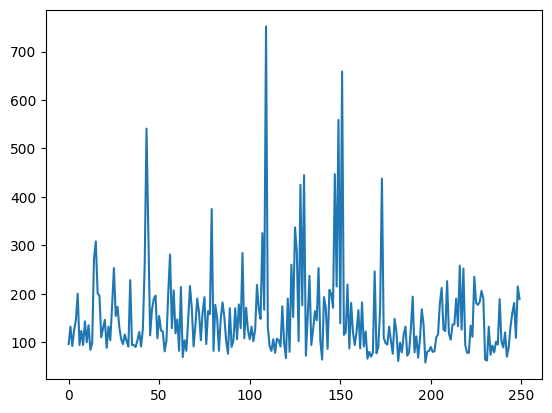

In [32]:
simulation.show_plot(x, y)

In [27]:
simulation = QLearningAgent(np.array(pacman_table),
                            initial_state=[1, 1],
                            learning_rate=0.1,
                            gamma=0.1,
                            exploration_rate=0.1,
                            exploration_decay=0.995,
                            rewards={'W': -1000,
                                     'D': 1,
                                     'E': -0.1})
simulation.initialize()
simulation.q_function()
x, y = simulation.learn(num_episode=250)
simulation.print_path()

episode 0 ended with 163 steps
episode 1 ended with 134 steps
episode 2 ended with 64 steps
episode 3 ended with 153 steps
episode 4 ended with 126 steps
episode 5 ended with 118 steps
episode 6 ended with 210 steps
episode 7 ended with 130 steps
episode 8 ended with 97 steps
episode 9 ended with 89 steps
episode 10 ended with 148 steps
episode 11 ended with 142 steps
episode 12 ended with 232 steps
episode 13 ended with 111 steps
episode 14 ended with 212 steps
episode 15 ended with 90 steps
episode 16 ended with 158 steps
episode 17 ended with 1529 steps
episode 18 ended with 83 steps
episode 19 ended with 136 steps
episode 20 ended with 100 steps
episode 21 ended with 371 steps
episode 22 ended with 255 steps
episode 23 ended with 145 steps
episode 24 ended with 531 steps
episode 25 ended with 166 steps
episode 26 ended with 114 steps
episode 27 ended with 111 steps
episode 28 ended with 251 steps
episode 29 ended with 386 steps
episode 30 ended with 95 steps
episode 31 ended with 1

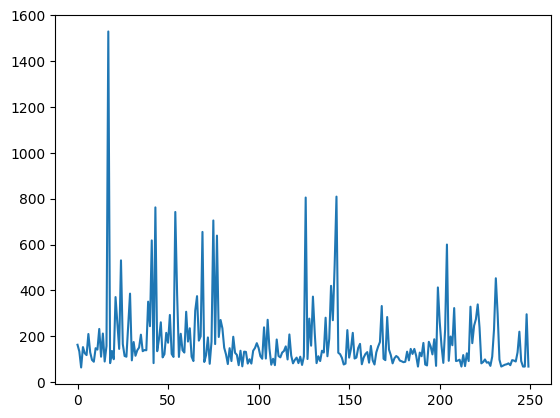

In [28]:
simulation.show_plot(x, y)

### Q4: The explaination is provided in top of the page.

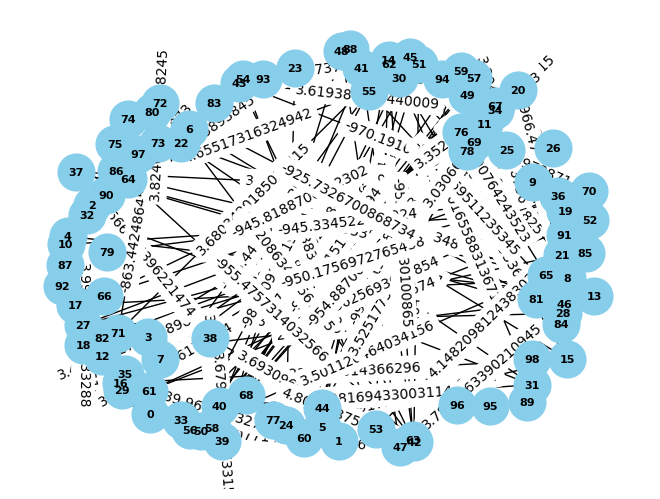

In [50]:
simulation.print_graph()

### Q6:Test your code on another arbitrary environment and report the result.

In [6]:
pacman_table_2 = [
    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
    ['W', 'A', 'D', 'D', 'D', 'W', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'D', 'W', 'W', 'D', 'D', 'D', 'W', 'W', 'D', 'W'],
    ['W', 'D', 'W', 'W', 'D', 'D', 'D', 'W', 'W', 'D', 'W'],
    ['W', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'W', 'D', 'D', 'W', 'W', 'W', 'D', 'D', 'W', 'W'],
    ['W', 'D', 'D', 'D', 'D', 'W', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'D', 'W', 'D', 'D', 'D', 'D', 'D', 'W', 'D', 'W'],
    ['W', 'D', 'D', 'D', 'D', 'W', 'D', 'D', 'D', 'D', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
]

In [7]:
simulation = QLearningAgent(np.array(pacman_table_2),
                            initial_state=[1, 1],
                            learning_rate=0.1,
                            gamma=0.9,
                            exploration_rate=0.1,
                            exploration_decay=0.995,
                            rewards={'W': -1000,
                                     'D': 1,
                                     'E': -0.1})
simulation.initialize()
simulation.q_function()
x, y = simulation.learn(num_episode=250)
simulation.print_path()

episode 0 ended with 325 steps
episode 1 ended with 121 steps
episode 2 ended with 163 steps
episode 3 ended with 145 steps
episode 4 ended with 405 steps
episode 5 ended with 822 steps
episode 6 ended with 167 steps
episode 7 ended with 167 steps
episode 8 ended with 158 steps
episode 9 ended with 153 steps
episode 10 ended with 247 steps
episode 11 ended with 329 steps
episode 12 ended with 223 steps
episode 13 ended with 668 steps
episode 14 ended with 133 steps
episode 15 ended with 219 steps
episode 16 ended with 137 steps
episode 17 ended with 113 steps
episode 18 ended with 177 steps
episode 19 ended with 181 steps
episode 20 ended with 337 steps
episode 21 ended with 180 steps
episode 22 ended with 263 steps
episode 23 ended with 133 steps
episode 24 ended with 535 steps
episode 25 ended with 288 steps
episode 26 ended with 121 steps
episode 27 ended with 134 steps
episode 28 ended with 200 steps
episode 29 ended with 193 steps
episode 30 ended with 166 steps
episode 31 ended w

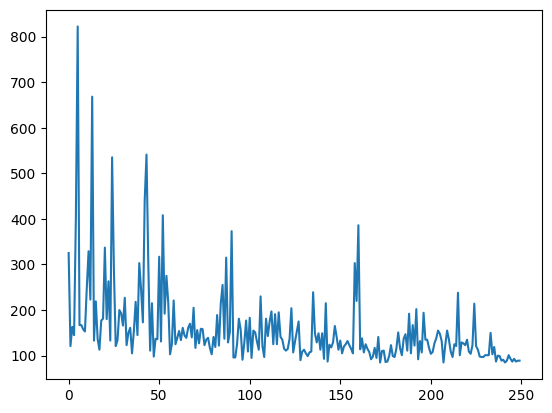

In [8]:
simulation.show_plot(x, y)